## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 2 #

### esercizio 2.1 

Abbiamo calcolato, via metodi Montecarlo, l'integrale $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
in due diversi modi.

Nel primo caso campionando una distribuzione uniforme in $[0,1]$.
Successivamente usando l'importance sampling, campionando cioè una distribuzione non uniforme nell'intervallo $[0,1]$, in questo specifico caso una distribuzione lineare.
La pdf in questione è:
$P(x) = 2(1-x)$

ne riportiamo una rappresentazione:

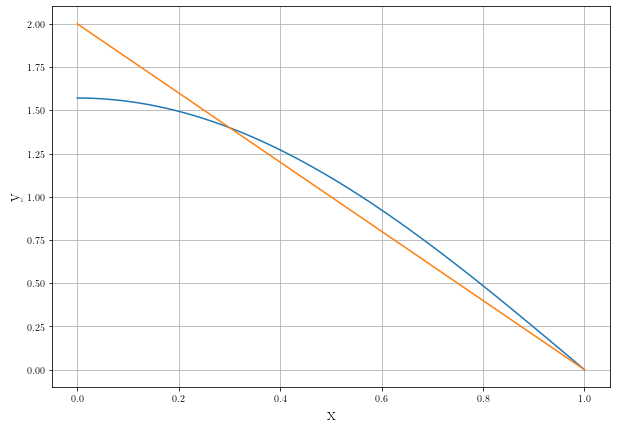

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

plt.figure(figsize=(10,7))
x = np.linspace(0., 1., 100)
f = np.cos(math.pi/2. * x)
P = 2*(1 - x) 
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.plot(x, math.pi/2. * f)
plt.plot(x, P)
plt.grid(True)
plt.show()

Si può notare come questa retta approssimi l'integranda meglio di quanto non faccia la distribuzione uniforme, ci aspettiamo pertanto una convergenza migliore dal secondo metodo rispetto al primo.

Per implementare tale conto abbiamo fatto uso della classe Integral definita nel file Integral.h e nello specifico dei metodi Media e MediaRetta. Per implementare la distribuzione lineare come metodo della classe Random contentuta in Random.h abbiamo utilizzato il metodo dell'inversione della distribuzione cumulativa. Per implentare l'integranda abbiamo implementato una classe ad hoc, tuttavia come classe figlia della classe FunzioneBase. Integrale ha infatti tra i datamembri una FunzioneBase, in questo modo, sfruttando il polimorfismo e il metodo virtual Eval, è possibile usare la stessa classe integrale per qualsiasi integranda, purchè questa sia appunto definita come classe figlia di FunzioneBase.

Riportiamo ora i risultati ottenuti per la stima degli integrali.

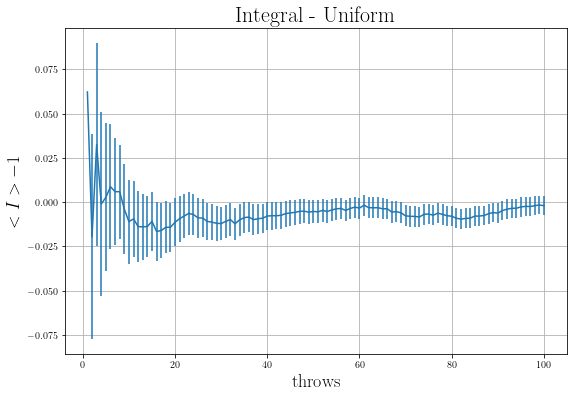

Risultato finale : 
0.997939
Incertezza : 
0.00525754


In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("output2.1.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.figure(figsize=(9,6))
plt.errorbar(x,f-1,yerr=error)
plt.xlabel('throws', fontsize=18)
plt.ylabel('$<I>-1$', fontsize=18)
plt.title('Integral - Uniform', fontsize=22)

plt.grid(True)
plt.show()

print('Risultato finale : ')
print(f[-1])
print('Incertezza : ')
print(error[-1])

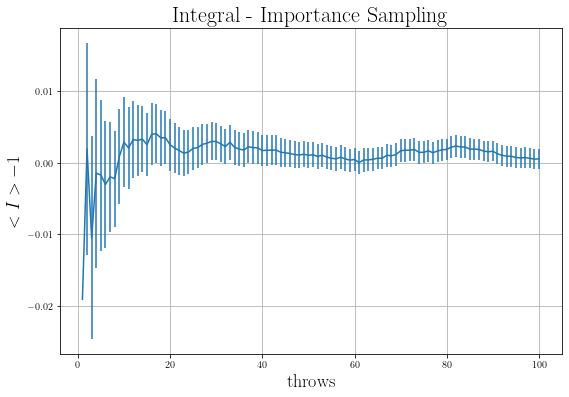

Risultato finale : 
1.00054
Incertezza : 
0.00137496


In [13]:
x, f, error = np.loadtxt("output2.12.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.figure(figsize=(9,6))
plt.errorbar(x,f-1,yerr=error)
plt.xlabel('throws', fontsize=18)
plt.ylabel('$<I>-1$', fontsize=18)
plt.title('Integral - Importance Sampling', fontsize=22)

plt.grid(True)
plt.show()

print('Risultato finale : ')
print(f[-1])
print('Incertezza : ')
print(error[-1])

In entrambi i casi abbiamo riportato la differenza tra valore trovato e atteso dell'integrale in funzione del numero di lanci. L'incertezza è stata stimata col metodo dei blocchi. Abbiamo effettuato $10^4$ lanci, suddivisi in $100$ blocchi. Può essere interessante notare come l'incertezza con il sampling uniforme sia circa 5 volte maggiore di quella ottenuta con l'importance sampling, andando a confermare la previsione di miglior convergenza nel secondo caso.

### esercizio 2.1

Nel secondo esercizio abbiamo simulato due RandomWalk 3D, di due diverse tipologie. Entrambi caratterizzati da un passo costante di modulo $a=1$, il primo è discreto: i passi avvengono possono avvenire solo lungo uno dei tre assi cartesiani, sia in avanti che indietro. Per implementarlo abbiamo fatto uso di un'unica variabile casuale: dividendo il suo intervallo di valori possibili in 6 sottointervalli in base al sotto intervallo in cui cadeva il numero estratto potevamo determinare univocamente direzione e verso del passo. Il secondo RandomWalk è invece continuo, era possibile una qualsiasi direzione era possibile. In questo caso per determinare la direzione e il verso ci siamo avvalsi di due variabili casuali, $\theta$ e $\phi$, rispettivamente comprese tra $[0,\pi]$ e  $[0,2\pi]$, rappresentanti i due angoli delle coordinate sferiche. 

Primo scopo dell'esercizio era rappresentare in un grafico  $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ come funzione del numero di $N$ step con $N\in [0,10^2]$. $\vec{r}_N$ rappresenta il vettore congiungente l'N-esimo step al punto di partenza del RW, fissato con l'origine degli assi.
Dovevamo poi verificare come l'andamento di tale grafico fosse compatibile con $f(N)=k\sqrt{N}$.

Per fare ciò abbiamo simulato $10^4$ RandomWalk da $100$ step per ogni tipologia, andando a fare la media della distanza per ogni step con il metodo dei blocchi, suddividendo pertanto i RW in $100$ blocchi. 

Risultati del fit : 
Parametro ottimizzato k = [1.00395694]
Incertezza del parametro = [0.00018606]



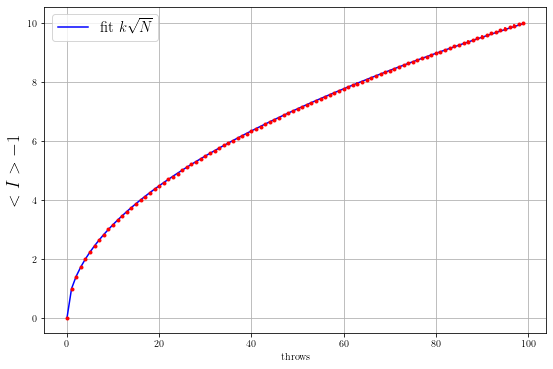

Valor medio della distanza dall'origine al passo 100:  10.0083 pm 0.041508


In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

M = 10000
N = 101

x, y, error = np.loadtxt("output2.2.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.figure(figsize=(9,6))
plt.errorbar(x,y,yerr=error, fmt='.', color='red')
plt.xlabel('throws')
plt.ylabel('$<I>-1$', fontsize=18)
plt.grid(True)


p_opt, p_cov = curve_fit(f, x, y, bounds=([0],[2]))
y_fit = f(x,p_opt[0])
plt.plot(x,y_fit, color='b', label = 'fit $k\sqrt{N}$') # plotting fitted function
plt.legend(loc='best', fontsize=15)

print("Risultati del fit : ")
print("Parametro ottimizzato k =", p_opt)
print('Incertezza del parametro =',  np.sqrt(np.diagonal(p_cov)))
print()

plt.show()

print("Valor medio della distanza dall'origine al passo 100: ", y[99],  'pm'  , error[99])

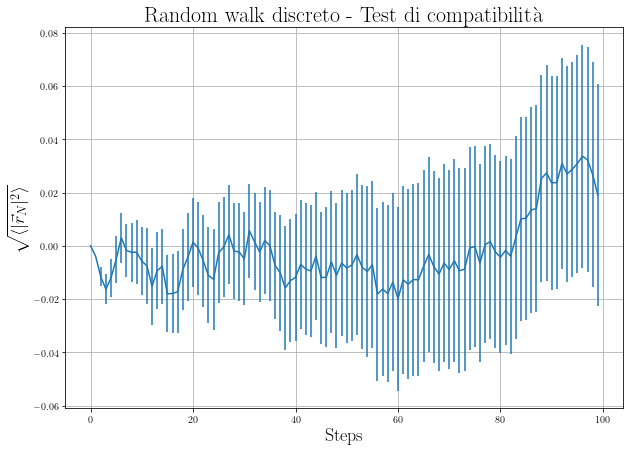

In [9]:
z = np.zeros(N)
plt.figure(figsize=(10,7))
plt.errorbar(x, y - p_opt[0] * np.sqrt(x), yerr=error, label="simulated pi")


plt.xlabel('Steps', fontsize=18)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$', fontsize=18)
plt.title('Random walk discreto - Test di compatibilità', fontsize=22)
plt.grid(True)

plt.show()

Risultati del fit : 
Parametro ottimizzato k = [1.00276819]
Incertezza del parametro = [0.00020309]



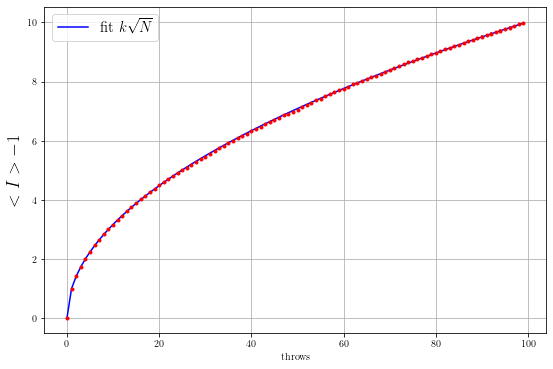

Valor medio della distanza dall'origine al passo 100:  9.98314 pm 0.0420044


In [15]:
def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

M = 10000
N = 101

x, y, error = np.loadtxt("output2.21.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.figure(figsize=(9,6))
plt.errorbar(x,y,yerr=error, fmt='.', color='red')
plt.xlabel('throws')
plt.ylabel('$<I>-1$', fontsize=18)
plt.grid(True)


p_opt, p_cov = curve_fit(f, x, y, bounds=([0],[2]))
y_fit = f(x,p_opt[0])
plt.plot(x,y_fit, color='b', label = 'fit $k\sqrt{N}$') # plotting fitted function
plt.legend(loc='best', fontsize=15)

print("Risultati del fit : ")
print("Parametro ottimizzato k =", p_opt)
print('Incertezza del parametro =',  np.sqrt(np.diagonal(p_cov)))
print()

plt.show()

print("Valor medio della distanza dall'origine al passo 100: ", y[99],  'pm'  , error[99])

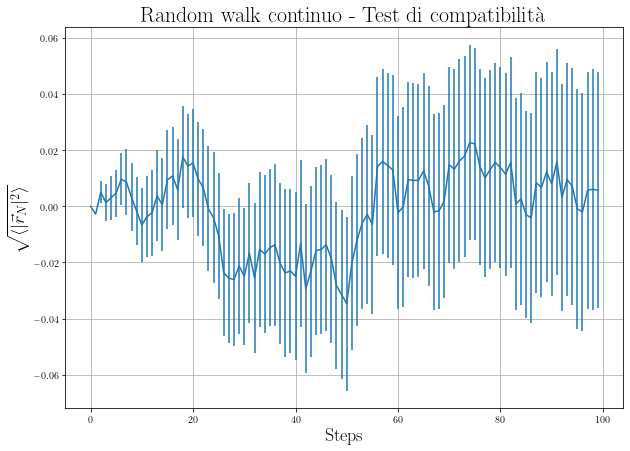

In [16]:
z = np.zeros(N)
plt.figure(figsize=(10,7))
plt.errorbar(x, y - p_opt[0] * np.sqrt(x), yerr=error, label="simulated pi")


plt.xlabel('Steps', fontsize=18)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$', fontsize=18)
plt.title('Random walk continuo - Test di compatibilità', fontsize=22)
plt.grid(True)

plt.show()

In entrambi i casi i risultati ottenuti sono compatibili con quelli attesi